In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Practice 3_data1.csv')
display(df.head())

,Date,Time,lights,s2
0,10-Jun-17,12:25:00,1,3
1,10-Jun-17,12:26:00,1,3
2,10-Jun-17,12:27:00,1,1
3,10-Jun-17,12:28:00,1,5
4,10-Jun-17,12:29:00,1,0


In [7]:
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv('Practice 3_data1.csv', header=0, index_col=0, squeeze=True)
X = series.s2
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.297673
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [90]:
df2 = pd.read_csv('Practice 3_data1.csv')
display(df.head())

from statsmodels.tsa.stattools import adfuller
data = df2.s2
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

,Date,Time,lights,s2
0,10-Jun-17,12:25:00,1,3
1,10-Jun-17,12:26:00,1,3
2,10-Jun-17,12:27:00,1,1
3,10-Jun-17,12:28:00,1,5
4,10-Jun-17,12:29:00,1,0


ADF Statistic: -12.297673
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### Correlation and Autocorrelation

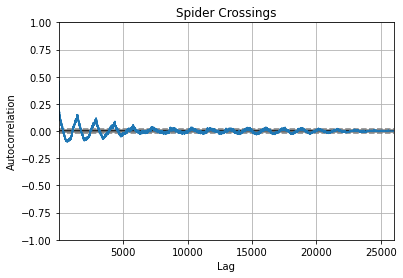

In [19]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.s2)
plt.title('Spider Crossings');

plt.show()

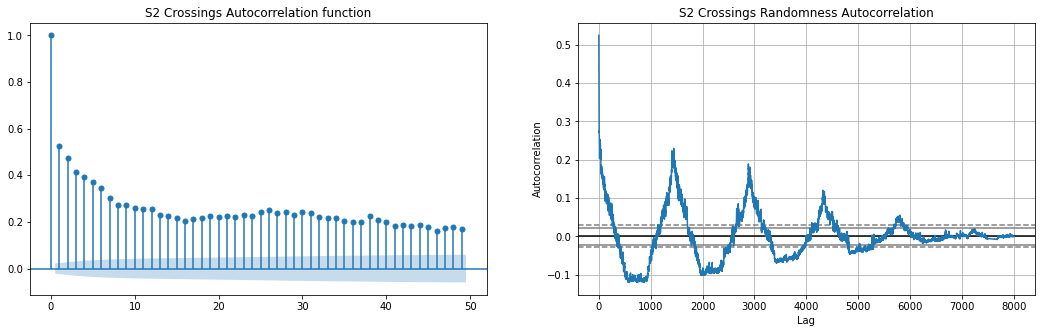

In [65]:
from statsmodels.graphics.tsaplots import plot_acf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
#f3.tight_layout()

plot_acf(df.s2[0:8000], ax=ax1, lags =  range(0,50))
ax1.set_title('S2 Crossings Autocorrelation function')

autocorrelation_plot(df.s2[0:8000], ax=ax2)
ax2.set_title('S2 Crossings Randomness Autocorrelation')

#plot_acf(series3, ax=ax3, lags = range(0, 5))     # note that max lags is 35
#ax3.set_title('shampoo-sales')

plt.show()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7995    0.0
7996    0.0
7997    0.0
7998    0.0
7999    0.0
Name: s2, Length: 8000, dtype: float64 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7995    0.0
7996    0.0
7997    0.0
7998    0.0
7999    0.0
Name: s2, Length: 8000, dtype: float64


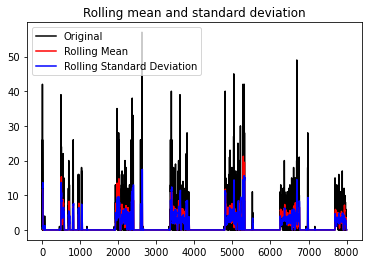

In [68]:
rmean=df.s2[0:8000].rolling(window=12).mean()
rstd=df.s2[0:8000].rolling(window=12).std()
print(rmean,rstd)
orig=plt.plot(df.s2[0:8000], color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

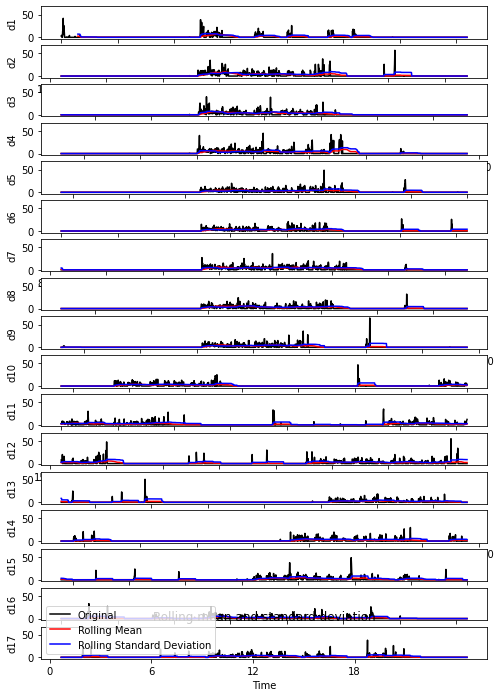

In [79]:
min_day = 1440
df['time_min'] = range(0, len(df.index))

rmean=df.s2.rolling(window=60).mean()
rstd=df.s2.rolling(window=60).std()

a = len(df.index)
b = a//1440
fig, axs = plt.subplots(b-1, 1, figsize = (8,12), sharey = True)

for i in range(0,b-1):
    axs[i].plot(df.time_min[1440*i:1440*(i + 1)], df.s2[1440*i:1440*(i + 1)], c = 'black', label = 'Original')
    axs[i].plot(df.time_min[1440*i:1440*(i + 1)], rmean[1440*i:1440*(i + 1)] , color='red',label='Rolling Mean')
    axs[i].plot(df.time_min[1440*i:1440*(i + 1)], rstd[1440*i:1440*(i + 1)], color='blue',label = 'Rolling Standard Deviation')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('d' + str(i+1))
    
plt.setp(axs[b-2], xticks=[23000, 23360, 23720, 24080], xticklabels = ['0', '6', '12', '18'])
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show()

In [ ]:
a = len(df.index)
b = a//1440
fig, axs = plt.subplots(b-1, 1, figsize = (8,12))

for i in range(0,b-1):
    axs[i].plot(df.time_min[1440*i:1440*(i + 1)], df.s2[1440*i:1440*(i + 1)], c = 'black')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('d' + str(i+1))
    
plt.setp(axs[b-2], xticks=[23000, 23360, 23720, 24080], xticklabels = ['0', '6', '12', '18'])
plt.show()

In [59]:
a = len(df.index)
b = a//1440
value = []

#fig, axs = plt.subplots(b-1, 1, figsize = (8,12))

for i in range(0, len(df.index), 60):
    t = np.sum(df.s2[i: i+60])
    #print(t)
    value.append(t)

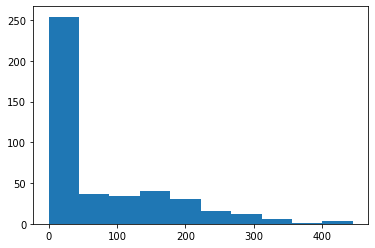

In [60]:
plt.hist(value)
plt.show()